# UCCD2063 Machine Learning Classification Assignment
The following is the Machine Learning algorithm designed to conduct classification tasks for multivariant attributes.

**Contributors:**
- Yee Zi Yang 18ACB02834
- Lee Wai Hin 18ACB02736
- Tan Jie Nan 18ACB02121

**Classification Dataset:**
- Firewall rules action on malicious data transfer

## Table of Content

### Contributor's Section:
1. [Wai Hin's Code](#waihin_section)
2. [Jie Nan's Code](#jienan_section)
3. [Sammy's Code](#sammy_section)
4. [Logistic Regression](#log_reg_section)

<div class="alert alert-block alert-info">
The following is still under development and currently in alpha testing phase.
</div>

## 1.0 Data Initialization

In [90]:
#Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
print ('==> Loading specified dataset...\n')
firewall_data =  pd.read_csv("Firewall_data_sets.csv")
print ('==> Dataset loading completed.\n')


==> Loading specified dataset...

==> Dataset loading completed.



In [91]:
firewall_data.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [92]:
firewall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [93]:
firewall_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


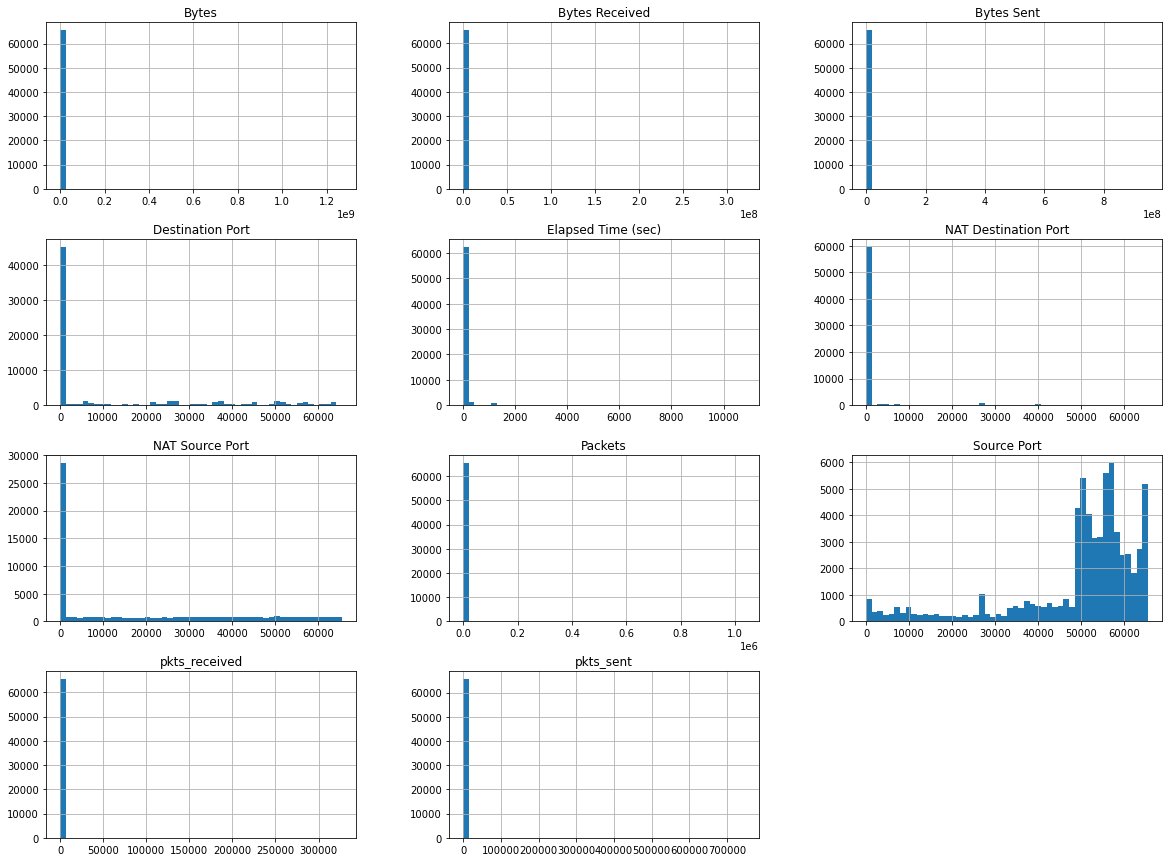

In [94]:
firewall_data.hist(bins=50,figsize=(20,15))
plt.show()

In [95]:
firewall_data.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [96]:
firewall_data.corr() #correlation

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954
pkts_sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550


<a id="waihin_section"></a>
# WaiHin's Code Here
<hr>

In [97]:
from sklearn.preprocessing import LabelBinarizer

lb_encoder = LabelBinarizer()
firewall_data.Action = lb_encoder.fit_transform(firewall_data.Action)
#firewall_data
#print(firewall_data.Action.value_counts().count)
#print(firewall_data.describe())
#print(type(firewall_data))
firewall_data.corr()


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.132189,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.367960,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.754348,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.235859,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747
Action,0.132189,-0.367960,0.754348,0.235859,1.000000,0.014869,0.005017,0.026119,0.017083,0.187367,0.010804,0.023798
Bytes,0.000221,-0.005297,0.010659,0.003975,0.014869,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.005017,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.026119,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039
Packets,-0.001742,-0.006063,0.012633,0.004605,0.017083,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.187367,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954


In [98]:
type(firewall_data)

pandas.core.frame.DataFrame

In [99]:
firewall_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,0.574376,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,0.494441,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,1.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [100]:
corr_matrix = firewall_data.corr()
corr_matrix['Action'].sort_values(ascending=False)

Action                  1.000000
NAT Source Port         0.754348
NAT Destination Port    0.235859
Elapsed Time (sec)      0.187367
Source Port             0.132189
Bytes Received          0.026119
pkts_received           0.023798
Packets                 0.017083
Bytes                   0.014869
pkts_sent               0.010804
Bytes Sent              0.005017
Destination Port       -0.367960
Name: Action, dtype: float64

In [101]:
#print('lala')
#from pandas.plotting import scatter_matrix
#print('lala')
#selected_cols = ['Source Port', 'Destination Port', 'NAT Source Port']
#print('lala')
#scatter_matrix(firewall_data[selected_cols], figsize=(12,8)) 
#print('lala')
#plt.show()
#print('lala')

# Data Preprocessing

In [102]:
firewall_data.head(8)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,1,177,94,83,2,30,1,1
1,56258,3389,56258,3389,1,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,1,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,1,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,1,25358,6778,18580,31,16,13,18
5,51465,443,39975,443,1,3961,1595,2366,21,16,12,9
6,60513,47094,45469,47094,1,320,140,180,6,7,3,3
7,50049,443,21285,443,1,7912,3269,4643,23,96,12,11


In [103]:
# write code to separate the output (y) from input (X)
X = firewall_data.drop('Action', axis = 1)
y = firewall_data['Action']

In [106]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)

#Summarize scores
np.set_printoptions(precision = 5)
print(fit.scores_)

features = fit.transform(X)

#Summarize selected features
print(features[0:4, :])


[5.39571e+06 2.86033e+08 9.33478e+08 1.29453e+08 4.70895e+09 1.07965e+09
 3.62931e+09 4.89829e+06 3.19688e+06 1.91424e+06 2.98475e+06]
[[   53 54587   177    94    83]
 [ 3389 56258  4768  1600  3168]
 [50321 43265   238   118   120]
 [ 3389 50553  3327  1438  1889]]


In [107]:
X = firewall_data.drop(['Source Port', 'NAT Destination Port', 'Packets','Elapsed Time (sec)', 'pkts_sent', 'pkts_received', 'Action'], axis =1)

In [28]:
print('Shape of original dataset, train', firewall_data.shape)
print('X: shape=', X.shape, 'type=', type(X))
print('y: shape=', y.shape, 'type=', type(y))
print(y)

Shape of original dataset, train (65532, 12)
X: shape= (65532, 8) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (65532,) type= <class 'pandas.core.series.Series'>
0        1
1        1
2        1
3        1
4        1
        ..
65527    1
65528    1
65529    0
65530    0
65531    0
Name: Action, Length: 65532, dtype: int32


In [29]:
X.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
dtype: int64

In [30]:
y.isnull().sum()

0

In [31]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
# Your code here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

print('full set shape =', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)


full set shape = (65532, 8)
train shape= (52425, 8)
test shape= (13107, 8)


In [33]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [35]:
print(X_train.mean (axis = 0))
print(X_train.std (axis = 0))

print('>>> Mean of all columns:\n', X_train.mean())
print('\n>>> Std of all columns:\n', X_train.std())

[ 1.11209e-16 -1.75307e-15 -5.42403e-16 -2.26832e-16 -3.80219e-16
 -8.68111e-17  6.61928e-16  1.24616e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]
>>> Mean of all columns:
 2.5912615983430455e-17

>>> Std of all columns:
 1.0000000000000293


In [36]:
print('Possible values of Action:\n', lb_encoder.classes_)

Possible values of Action:
 ['allow' 'deny' 'drop' 'reset-both']


In [37]:
print('X_train shape: ', X_train.shape)
print(type(y_train))
print('y_train shape: ', y_train.shape)

X_train shape:  (52425, 8)
<class 'numpy.ndarray'>
y_train shape:  (52425,)


In [38]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
#create a instance of DecisionTreeRegressor
#tree_reg = ?
tree_reg = DecisionTreeRegressor()

#Train the regressor model
tree_reg.fit(X_train, y_train)

#Predict on training set using trained regressor
y_pred = tree_reg.predict(X_train)

#Show the result of 10 random samples
def show10results(y_train, y_pred):
    print('Result for the 10 random samples: ')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))


show10results(y_train, y_pred)

#Compute and show the RMSE on training set
tree_mse = mean_squared_error(y_pred, y_train)
tree_rmse = np.sqrt(tree_mse)
print('RMSE = ', tree_rmse)

Result for the 10 random samples: 
actual =       1 pred =      1
actual =       1 pred =      1
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
RMSE =  0.011657977553138051


In [39]:
from sklearn.ensemble import RandomForestRegressor

# create a instance of RandomForestRegressor
# forest_reg = ?
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the regressor model
forest_reg.fit (X_train, y_train)

# Predict on training set using trained regressor
y_pred = forest_reg.predict(X_train)
# Show the result of 10 random samples
def show10results(y_train, y_pred):
    print('Result for the 10 random samples:')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))

show10results(y_train, y_pred)


# Compute and show the RMSE on training set
forest_mse = mean_squared_error(y_pred, y_train)
forest_rmse= np.sqrt(forest_mse)
print('RMSE =', forest_rmse)

Result for the 10 random samples:
actual =       1 pred =      1
actual =       0 pred =      0
actual =       1 pred =      1
actual =       1 pred =      1
actual =       1 pred =      1
actual =       1 pred =      1
actual =       0 pred =      0
actual =       1 pred =      1
actual =       1 pred =      1
actual =       0 pred =      0
RMSE = 0.015565847625678064


In [40]:
firewall_data.Action.mean()

0.5743758774339254

# Evaluating 

In [41]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores: ', scores, '\n')
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
# perform k-fold cross-out validation
# use cross_val_score on tree_reg
k_fold_scores = cross_val_score(tree_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

# convert NMSE to RMSE
tree_rmse_scores = np.sqrt(-k_fold_scores)

# use display_scores to show the results
display_scores(tree_rmse_scores)

Scores:  [0.03442 0.0337  0.02712 0.02762 0.03666] 

Mean:  0.03190411989999752
Standard deviation:  0.0038323184795391353


In [42]:
# use cross_val_score on forest_reg

k_fold_scores = cross_val_score(forest_reg, X_train, y_train, scoring ='neg_mean_squared_error', cv=5)

# covert NMSE to RMSE
forest_rmse_scores = np.sqrt(-k_fold_scores)

# use display_scores to show the results
display_scores(forest_rmse_scores)

Scores:  [0.02907 0.02942 0.02618 0.02471 0.02917] 

Mean:  0.027711593018371183
Standard deviation:  0.001908717851033406


# SGD classifier

### Training an action model

In [43]:
# import the SGD from sklearn

from sklearn.linear_model import SGDClassifier

# Train using the training set
sgd_clf = SGDClassifier (random_state = 42, max_iter = 5, tol = None)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=None)

### Performing predictions

In [44]:
y_pred_sgd = sgd_clf.predict(X_train)
y_pred_sgd

array([0, 1, 1, ..., 0, 1, 1])

#### Detection result for some randomly generated samples

In [45]:
def peek_results(actual, predicted, num = 20):
    print('actual | Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' | ', predicted[sel])

peek_results(y_train, y_pred_sgd)

actual | Predicted
------------------
1  |  1
1  |  1
0  |  0
1  |  1
1  |  1
1  |  1
1  |  1
1  |  1
0  |  0
1  |  1
0  |  0
0  |  0
1  |  1
1  |  1
1  |  1
1  |  1
1  |  1
1  |  1
0  |  0
1  |  1


### Performance measure: Accuracy

In [46]:
from sklearn.metrics import accuracy_score

# compute accuracy using accuracy_score and show the result
train_acc = accuracy_score(y_train, y_pred_sgd)
print('Training accuracy: {:.4f}'.format(train_acc))

Training accuracy: 0.9861


### Measuring training accuracy using Cross-validation

In [47]:
# compute 5-fold cross validation accuracy and show the result
# k_scores = ....

k_scores = cross_val_score(sgd_clf, X_train, y_train, cv = 5, scoring = 'accuracy')
k_scores

array([0.9877 , 0.98579, 0.98445, 0.98608, 0.98884])

#### Problems with accuracy

In [59]:
y_train_pred_sgd = sgd_clf.predict(X_train) 
print('Accuracy using prediction values: ', accuracy_score(y_train, y_train_pred_sgd))

y_train_allzero = np.zeros(len(y_train), dtype=bool)
print('Accuracy using prediction values: ', accuracy_score(y_train, y_train_allzero))

y_train_allzero = np.ones(len(y_train), dtype=bool)
print('Accuracy using prediction values: ', accuracy_score(y_train, y_train_allzero))

Accuracy using prediction values:  0.9860944206008584
Accuracy using prediction values:  0.4266666666666667
Accuracy using prediction values:  0.5733333333333334


### Performance Measure: Confusion Matrix

#### Perform cross-validated prediction

In [49]:
from sklearn.model_selection import cross_val_predict

# perform cross-validation prediction using cross_val_predict
y_pred_cv = cross_val_predict(sgd_clf, X_train, y_train, cv = 5)
y_pred_cv

array([0, 1, 1, ..., 0, 1, 1])

In [50]:
peek_results(y_train, y_pred_cv)

actual | Predicted
------------------
1  |  1
1  |  1
1  |  1
0  |  0
1  |  1
1  |  0
0  |  0
1  |  1
1  |  1
1  |  1
0  |  0
1  |  1
0  |  0
1  |  1
1  |  1
1  |  1
1  |  1
1  |  1
1  |  1
1  |  1


#### Compute the confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_train, y_pred_cv)
print(cm)

[[22347    21]
 [  683 29374]]


### Performance Measure: Precision, Recall and F1 Score

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# compute and print the precision, recall and f1 score
print('Precision = ', precision_score(y_train, y_pred_cv))
print('Recall = ', recall_score(y_train, y_pred_cv))
print('Precision = ', f1_score(y_train, y_pred_cv))


Precision =  0.9992855927878891
Recall =  0.9772765079681938
Precision =  0.9881585144318105


### Performance Measure: Precision-Recall curve

#### Generating prediction scores

In [53]:
def peek_scores(actual, scores, num = 20):
    print('actual | score')
    print('---------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' | ', scores[sel])

y_scores = sgd_clf.decision_function(X_train) # retrieve classification scores

In [54]:
peek_scores(y_train, y_scores)

actual | score
---------------
1  |  7.748899963706187
0  |  -1.0659818703681907
0  |  -1.407050446635397
0  |  -1.0673070470476365
1  |  0.9851648161286555
0  |  -1.4482855847235818
1  |  33.054384978060874
1  |  27.532932096020517
1  |  31.31091864906913
0  |  -1.0532258692579077
1  |  24.535253255946117
1  |  29.240826204923685
0  |  -1.0649497362760627
1  |  30.198672645806802
1  |  15.770247505373483
1  |  12.910956396241513
1  |  22.076885541034112
0  |  -1.4992385682258327
1  |  10.469865194302375
0  |  -1.0653074710916446


In [55]:
# retrieve the average cross-validated prediction score values for all samples
# y_scores_cv = ....
y_scores_cv = cross_val_predict(sgd_clf, X_train, y_train, cv = 5, method = 'decision_function')
y_scores_cv

array([-1.00583, 20.74463, 18.72774, ..., -1.12679, 10.26419, 19.03115])

#### Plot precision and recall graph

In [63]:
from sklearn.metrics import precision_recall_curve
# compute precision-recall pairs for different threshold values
# precisions, recalls, thresholds = .....
precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

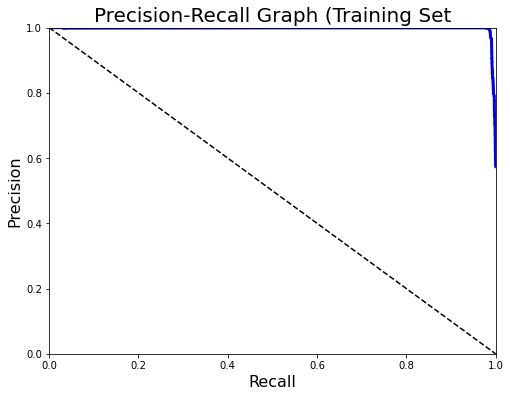

In [62]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel('Recall', fontsize = 16)
    plt.ylabel('Precision', fontsize = 16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title('Precision-Recall Graph (Training Set', fontsize = 20)
plt.show()

# Performance measure: ROC curve

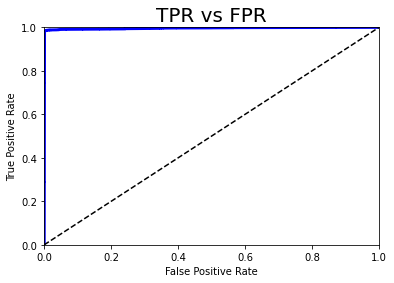

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)
    
plot_roc_curve(fpr, tpr)


# The AUC (Area under curve) measure

In [67]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.9960


# Evaluate model on test set

In [65]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_test = sgd_clf.predict(X_test)

print('Test precision = {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Test recall = {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('Test f1 score = {:.4f}'.format(f1_score(y_test, y_pred_test)))

Test precision = 0.9931
Test recall = 0.9929
Test f1 score = 0.9930


# Classifiers Comparison

### SGDClassifier vs RandomForestClassifier

In [69]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 200, random_state = 42)
sgd_result = cross_validate (sgd_clf, X_train, y_train, cv=3, scoring=['accuracy', 'precision', 'recall', 'f1'])

print('SGDClassifier: validation accuracy  = {:.4f}'.format(sgd_result['test_accuracy'].mean()))
print('SGDClassifier: validation recall    = {:.4f}'.format(sgd_result['test_recall'].mean()))
print('SGDClassifier: validation precision = {:.4f}'.format(sgd_result['test_precision'].mean()))
print('SGDClassifier: validation f1        = {:.4f}'.format(sgd_result['test_f1'].mean()))

SGDClassifier: validation accuracy  = 0.9861
SGDClassifier: validation recall    = 0.9764
SGDClassifier: validation precision = 0.9993
SGDClassifier: validation f1        = 0.9877


In [70]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
forest_result = cross_validate(forest_clf, X_train, y_train, cv = 5, scoring = ['accuracy', 'precision', 'recall', 'f1'])

print('Forest: validation accuracy = {:.4f}'.format(forest_result['test_accuracy'].mean()))
print('Forest: validation recall = {:.4f}'.format(forest_result['test_recall'].mean()))
print('Forest: validation precision = {:.4f}'.format(forest_result['test_precision'].mean()))
print('Forest: validation f1 = {:.4f}'.format(forest_result['test_f1'].mean()))

Forest: validation accuracy = 0.9990
Forest: validation recall = 0.9986
Forest: validation precision = 0.9997
Forest: validation f1 = 0.9992


### Comparing classifiers using the ROC curve

#### SGDClassifier: decision_function
#### RandomForestClassifier: predict_proba

In [74]:
print('Computing scores for SGDClassifier...', end = '')
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv = 5, method = 'decision_function')
print('done')

print('Computing scores for RandomForestClassifier...', end='')
y_scores_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 5, method = 'predict_proba')
print('done')

Computing scores for SGDClassifier...done
Computing scores for RandomForestClassifier...done


In [75]:
print('Shape of y_scores_sgd:', y_scores_sgd.shape)
print('Shape of y_scores_sgd:', y_scores_forest.shape)

Shape of y_scores_sgd: (52425,)
Shape of y_scores_sgd: (52425, 2)


In [76]:
y_scores_forest = y_scores_forest[:, 1]

In [77]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve (y_train, y_scores_sgd)
fpr_forest, tpr_forest, thresholds_forest = roc_curve (y_train, y_scores_forest)


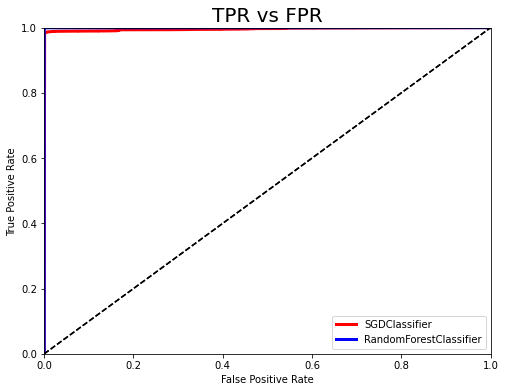

In [78]:
plt.figure(figsize = (8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd, 'r-', 'SGDClassifier')
plot_roc_curve(fpr_forest, tpr_forest, 'b-', 'RandomForestClassifier')
plt.legend (loc='lower right')
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score

auc_sgd = roc_auc_score(y_train, y_scores_sgd)
print('AUC for SGDClassifier = {:.4f}'.format(auc_sgd))

auc_forest = roc_auc_score(y_train, y_scores_forest)
print('AUC for RandomForestClassifier = {:.4f}'.format(auc_forest))

AUC for SGDClassifier = 0.9955
AUC for RandomForestClassifier = 0.9997


<a id="log_reg_section"></a>
# Logistic  Regression
<hr>

<div class="alert alert-block alert-info">
 <h1>Imports</h1>
</div>


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # to ensure we have consistent results

<div class="alert alert-block alert-info">
 <h1>GET THE DATASET</h1>
</div>

In [2]:
# Load the dataset

print('==> Loading specified dataset...\n')
firewall_data = pd.read_csv("Firewall_data_sets.csv")
print('==> Dataset loading completed.\n')

==> Loading specified dataset...

==> Dataset loading completed.



<div class="alert alert-block alert-info">
 <h1>VISUALIZE THE DATA</h1>
</div>


In [3]:
# Data Header
firewall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [4]:
# Data Preview
firewall_data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [5]:
# Additional Data Preview
firewall_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [6]:
print(firewall_data.shape)


(65532, 12)


In [7]:
firewall_data.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

The output for this datasets consists of 4 unique values: Allow, Deny, Drop and Reset-both.
Thus we must consider a <strong>multioutput regression</strong> solution.
One of the possible training model that could be used is: <strong>Logistic Regression</strong>

The actual dataset output, <strong>y</strong> is in categorical value, we no need to convert it to a numerical value because Logistic regression will automatically used the <strong>multinomial multiclass</strong> for this dataset output.

<div class="alert alert-block alert-info">
 <h1>DATA PREPROCESSING</h1>
</div>


In [8]:
X = firewall_data.drop(['Source Port', 'NAT Destination Port', 'Packets','Elapsed Time (sec)', 'pkts_sent', 'pkts_received', 'Action'], axis =1)
y = firewall_data['Action']

Since there a feature selection done on the dataset in <strong>SGD Classification</strong> section, we have concluded to drop a few features as those features meant to be drop isn't change the outcome accuracy and increase the computational time.

In [9]:
# test_size: what proportion of original data is used for test set
X = X.values
y = y.values
print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('full set shape =', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)
print('train shape=', y_train.shape)
print('test shape=', y_test.shape)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
full set shape = (65532, 5)
train shape= (45872, 5)
test shape= (19660, 5)
train shape= (45872,)
test shape= (19660,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<div class="alert alert-block alert-info">
 <h1>TRAINING THE DATA</h1>
</div>


In [10]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We need to <strong>normalize</strong> the data.

In [11]:
#Training the Logistic Regression
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(X_train, y_train)

# Making a prediction on the training sets
y_pred_train = model.predict(X_train)

# Let's see if the prediction is accurate enough
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    # return string   
    return str1  

def peek_results(actual, predicted, num = 20):
    print('Actual\t\t|\tPredicted')
    print('---------------------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_pred_train))
        print(listToString(actual[sel]), '\t\t|\t', listToString(predicted[sel]))
        
peek_results(y_train, y_pred_train)


Actual		|	Predicted
---------------------------------
allow 		|	 allow
drop 		|	 drop
allow 		|	 allow
allow 		|	 allow
deny 		|	 deny
deny 		|	 deny
deny 		|	 deny
allow 		|	 allow
drop 		|	 drop
deny 		|	 drop
drop 		|	 drop
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
deny 		|	 deny
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow


In [19]:
# Numbers of Misclassified samples
count_misclassified = (y_train != y_pred_train).sum()
print('Misclassified samples: {}'.format(count_misclassified))

# Accuracy Performance
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 1522
Accuracy: 0.97


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_train, y_pred_train)

print(cm)

[[25579   218   513     0]
 [   10  9750   742     0]
 [    0     0  9021     0]
 [    9    30     0     0]]


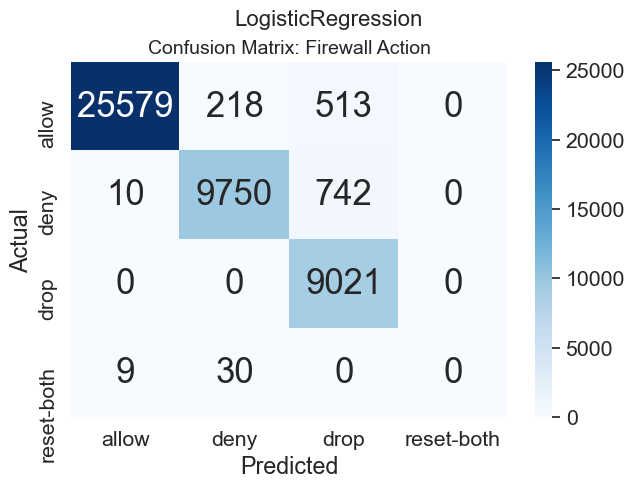

In [22]:
import seaborn as sn
def plot_confusion_matrix(cfm, y_test, caller, algor_name):
    # plot confusion_matrix
    df_cm = pd.DataFrame(cfm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    fig = plt.figure()
    plt.title('Confusion Matrix: ' + caller, fontsize=14)
    plt.suptitle(algor_name, fontsize=16)
    plt.style.use('default')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 25})
    plt.show()
    
plot_confusion_matrix(cm, y_train, 'Firewall Action', type(model).__name__)


<div class="alert alert-block alert-info">
 <h1>PERFORM THE ACCURACY MEASURE, F1, PRECISON AND RECALL SCORES</h1>
</div>
 

In [24]:
# Conducting performance measure on the model
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision = ', precision_score(y_train, y_pred_train, average = "weighted"))
print('Recall = ', recall_score (y_train, y_pred_train, average = "weighted"))
print('F1 score = ', f1_score(y_train, y_pred_train, average = "weighted"))

Precision =  0.9690277731185509
Recall =  0.9668207185211022
F1 score =  0.9669051643984093


In [27]:
# Cross validation of data
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.metrics import mean_squared_error as MSE

y_scores = CVS(model, X_test, y_test, cv=5)
print("5-fold cross validation scores: ",y_scores)

y_scores_cv = CVP(model, X_train, y_train, cv=5, method="predict")
print("\nCross Validation Predictions:\n",y_scores_cv)

5-fold cross validation scores:  [0.95447609 0.96312309 0.96032553 0.95930824 0.96337742]

Cross Validation Predictions:
 ['deny' 'deny' 'allow' ... 'allow' 'allow' 'allow']


<div class="alert alert-block alert-info">
 <h1>EVALUATION ON THE TEST</h1>
</div>


In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_test = sgd_clf.predict(X_test)

print('Test precision = {:.4f}'.format(precision_score(y_test, y_pred_test, average = "weighted")))
print('Test recall = {:.4f}'.format(recall_score(y_test, y_pred_test, average = "weighted")))
print('Test f1 score = {:.4f}'.format(f1_score(y_test, y_pred_test, average = "weighted")))

Test precision = 0.9674
Test recall = 0.9651
Test f1 score = 0.9652


C:\Users\Wai Hin(Darkin)\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div class="alert alert-block alert-info">
 <h1>Grid Search ( FINE TUNING)</h1>
</div>


In [32]:
from sklearn.model_selection import GridSearchCV
import time

log_model = LogisticRegression(solver = 'lbfgs', max_iter=1000)

# define param_grid (you may used the one defined above)
param_grid = [
    {
    'C': np.logspace(-4, 4, 20),
    'max_iter': [100, 1000, 2500, 5000]
    }
]

# create an instance of GridSearchCV using param_grid with 5-fold cv
grid_search = GridSearchCV(log_model, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

start_time = time.time()
print ('Performing grid search...', end = '')
# perform grid search
grid_result = grid_search.fit(X, y)
#Summarize results
print("Best: ", grid_result.best_score_, "using", grid_result.best_params_)
print("Execution time: " + str((time.time()-start_time)) + 'ms')
print('done')


Performing grid search...Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 75.0min finished


Best:  0.9783616323222828 using {'C': 0.03359818286283781, 'max_iter': 5000}
Execution time: 4504.567896604538ms
done


C:\Users\Wai Hin(Darkin)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.03359818286283781, max_iter=5000)

In [35]:
print('Best hyperparameter settings:', grid_search.best_params_)
# print('RMSE of the best model =', np.sqrt(-grid_search.best_score_))

Best hyperparameter settings: {'C': 0.03359818286283781, 'max_iter': 5000}


<div class="alert alert-block alert-info">
 <h1>PRC AND AUC</h1>
</div>

In [166]:
from sklearn.metrics import precision_recall_curve

# Exercise: compute precision-recall pairs for different threshold values 
# precisions, recalls, thresholds = (code here)
precisions, recalls, threholds = precision_recall_curve (y_train, y_scores_cv)

ValueError: multiclass format is not supported

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.show()

<a id="waihin_section"></a>
# Jason's Code Here
<hr>

<a id="sammy_section"></a>
# Sammy's Code Here
<hr>

In [80]:
# Data Initialization

# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random seeding to ensure we have consistent results
np.random.seed(42)

# Load the dataset
print ('==> Loading specified dataset...\n')
firewall_data =  pd.read_csv("Firewall_data_sets.csv")
print ('==> Dataset loading completed.\n')

==> Loading specified dataset...

==> Dataset loading completed.



In [81]:
# Data Header
firewall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [82]:
# Data Preview
firewall_data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [83]:
# Additional Data Preview
firewall_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [84]:
# Output ( y ) attributes
firewall_data.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

The output for this datasets consists of 4 unique values: Allow, Deny, Drop and Reset-both.<br>
Thus we must consider a **multioutput regression** solution.

Original


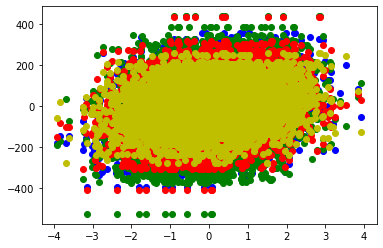

Trained Data


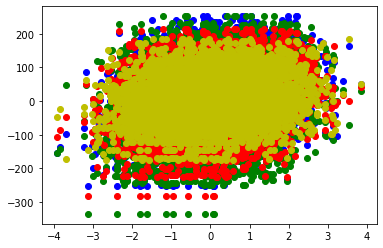

In [85]:
# k-nearest neighbors for multioutput regression
from sklearn.datasets import make_regression as MReg
from sklearn.neighbors import KNeighborsRegressor as KNReg

# Testing multioutput regression with KN 
X, y = MReg(n_samples=1000, n_features=10, n_informative=5, n_targets=4, random_state=42, noise=0.5)

y1 = y[:,0]
y2 = y[:,1]
y3 = y[:,2]
y4 = y[:,3]

print("Original")
plt.plot(X,y1,'bo',X,y2,'go',X,y3,'ro',X,y4,'yo')
plt.show()

from sklearn.model_selection import train_test_split as TTS
X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.2)

model = KNReg()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)

y1 = y_pred[:,0]
y2 = y_pred[:,1]
y3 = y_pred[:,2]
y4 = y_pred[:,3]

print("Trained Data")
plt.plot(X_train,y1,'bo',X_train,y2,'go',X_train,y3,'ro',X_train,y4,'yo')
plt.show()

Since the actual dataset output, y is in categorical attribute, we need to covnert it to a numerical attribute first.

In [86]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder as OHE

encoder = OHE(handle_unknown='ignore')
encoder.fit(firewall_data)
encoder.categories_

[array([    0,     5,    20, ..., 65532, 65533, 65534], dtype=int64),
 array([    0,     1,     7, ..., 65504, 65534, 65535], dtype=int64),
 array([    0,    20,    22, ..., 65530, 65534, 65535], dtype=int64),
 array([    0,     1,     7, ..., 65427, 65534, 65535], dtype=int64),
 array(['allow', 'deny', 'drop', 'reset-both'], dtype=object),
 array([        60,         61,         62, ...,  307104860,  428935914,
        1269359015], dtype=int64),
 array([       60,        61,        62, ..., 122661116, 213443641,
        948477220], dtype=int64),
 array([        0,        60,        62, ..., 237428641, 304353862,
        320881795], dtype=int64),
 array([      1,       2,       3, ...,  238334,  635946, 1036116],
       dtype=int64),
 array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
            9,    10,    11,    12,    13,    14,    15,    16,    17,
           18,    19,    20,    21,    22,    23,    24,    25,    26,
           27,    28,    29,    30,    31, 

In [87]:
action_cat = pd.DataFrame(encoder.fit_transform(firewall_data[['Action']]).toarray())
action_cat

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
65527,1.0,0.0,0.0,0.0
65528,1.0,0.0,0.0,0.0
65529,0.0,0.0,1.0,0.0
65530,0.0,0.0,1.0,0.0


In [ ]:
data = firewall_data.join(action_cat)
data

After joining the numerical value of 'Action', we can choose to drop the catergorical value of 'Action'

In [ ]:
data = data.drop('Action',axis=1)
data